###### Introduction
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In this problem, we are going to use Machine Learning Models to predict the Average Price of the Avocados.

###### Some relevant columns in the dataset:
Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

###### Importing required libraries


In [2]:
#Importing all necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

#Importing the warnings

import warnings
warnings.filterwarnings('ignore')

#Loading the dataset

url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv'
df=pd.read_csv(url)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#getting all columns name and checking null values
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

Observation:

1. Null values are present .

In [5]:
#as most of the rows are blank , we can drop them.
df.dropna(axis=0,how="all",inplace=True)
#again checking null valuesp
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Observation:

1. There are no null values present in the dataset.

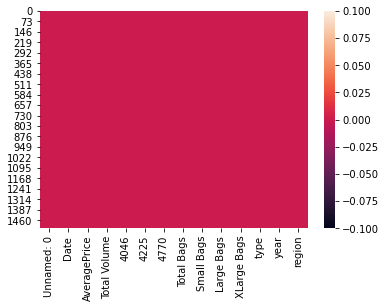

In [7]:
#Null values using heatmap
sns.heatmap(df.isnull())
plt.show()

In [8]:
#Lets check the datatypes of each column in datset.
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [11]:
#changing datatype into datetime format
df["Date"]=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29


In [12]:
#Understanding the data
a = df.groupby("year")['AveragePrice'].median()
print(a)
b = df["type"].unique()
print("Types of avocado are: ",b)
c = df["region"].unique()
print("Different no. of regions is",len(c), " : ", c)

year
2015.0    1.07
2016.0    1.12
Name: AveragePrice, dtype: float64
Types of avocado are:  ['conventional']
Different no. of regions is 51  :  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


###### Observation: 1.We now know that

a) Two years data is available - 2015 and 2016
b) Only one type of avocado is there - conventional
c) 51 regions data is present in our dataset

###### Data Visualisation¶

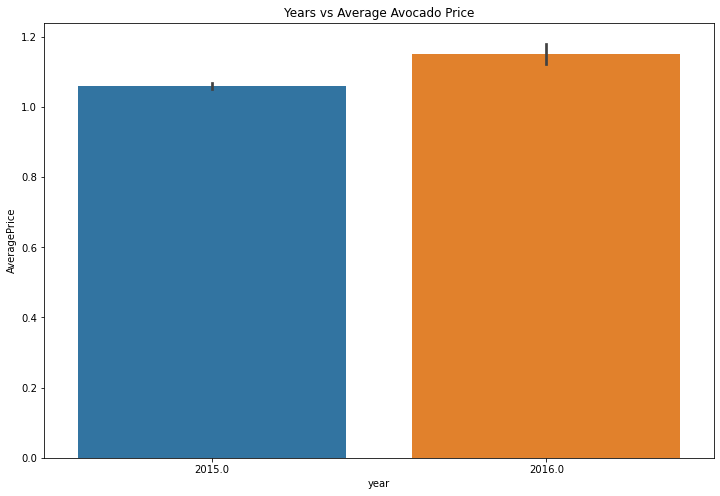

In [13]:
#first we will plot bargraph for average price variation by year and month
plt.figure(figsize=[12,8])
sns.barplot(x = 'year',y="AveragePrice" ,data = df)
plt.title("Years vs Average Avocado Price")
plt.show()

Observation:

1. Average price is higher for 2016 as compared to 2015

In [14]:
#we can drop unnamed column and type as they are irrelevant
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('type',axis=1,inplace=True)

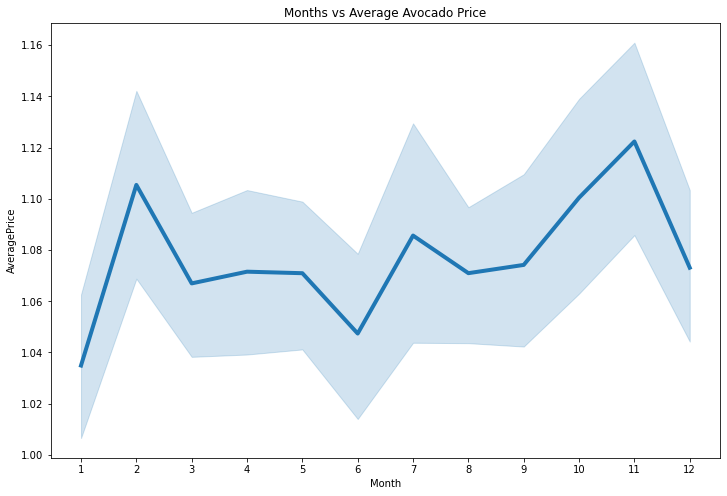

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Month", y="AveragePrice", data=df, linewidth='4.0')
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12))
plt.title("Months vs Average Avocado Price")
plt.show()

Observation:

1. As per observation there is price increase in month of October-November

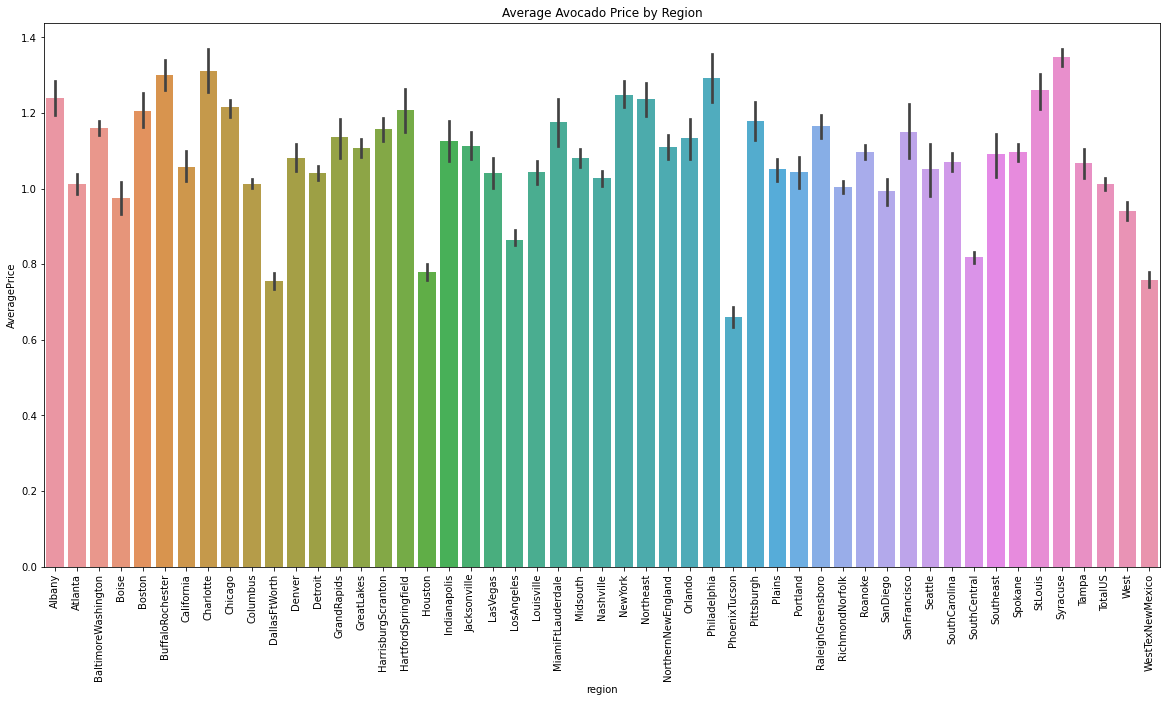

In [16]:
#Plotting the regionwise distribution of avocado price
plt.figure(figsize=(20,10))
sns.barplot(x="region", y="AveragePrice", data=df)
plt.title("Average Avocado Price by Region")
plt.xticks(rotation= 90)
plt.show()

Observation:

1.We observe that Syracuse and Philadelphia has highest avg. price

In [18]:
#Lets use the describe function 
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Observation: 
    
    1.Clearly some outliers are present in X-large and Total values column.

In [21]:
#we will tranform categorical data to float using label encoding for better analysis
le = LabelEncoder()
df["region"] = le.fit_transform(df["region"].astype(str))

In [22]:
print(df.dtypes)
df.head()

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
year                   float64
region                   int32
Month                    int64
Day                      int64
dtype: object


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11,29


In [23]:
#drop date column and converting rest to float
df.drop('Date',axis=1,inplace=True)

In [24]:
df.type  =df.astype(float)

In [25]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0,11,29


<AxesSubplot:>

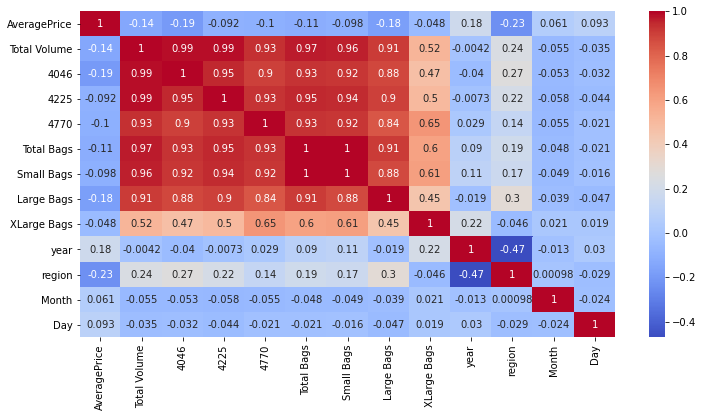

In [26]:
#checking correlation 
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Observation:

1.No significant correlation is observed between average price and other variables.

2.However good correlation is shown between other variables.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

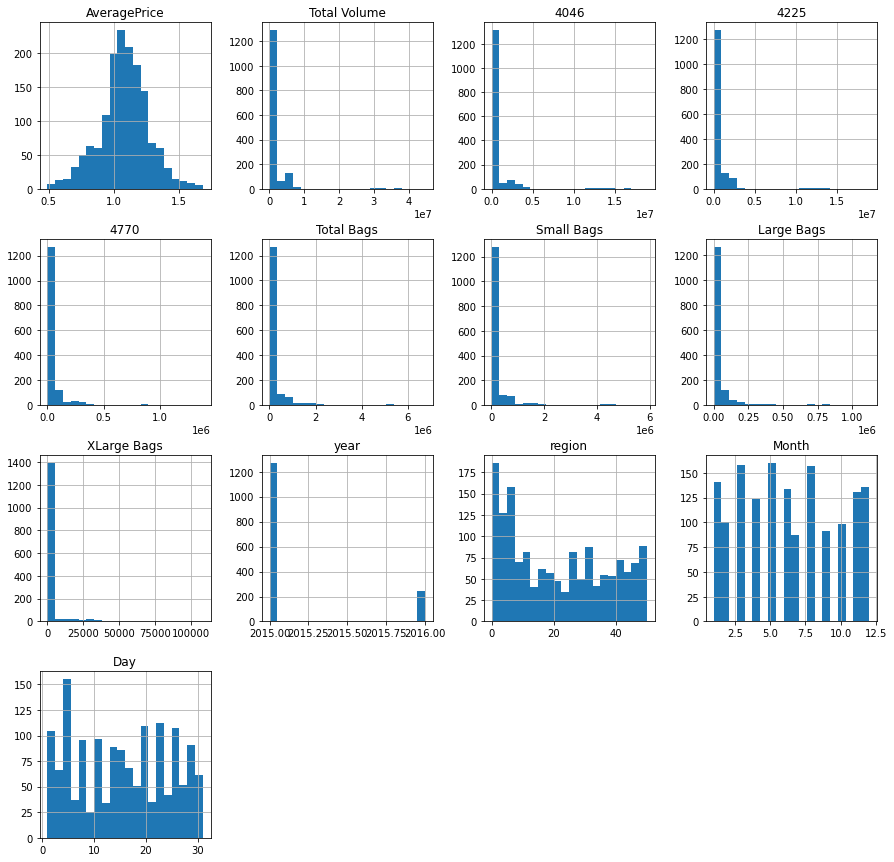

In [27]:
#Now plotting histogram for univariate analysis
df.hist(figsize=(15,15), layout=(4,4), bins=20)

In [28]:
#We can see that except average price , rest of the data is skewed towards left. So we will use skew

df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [29]:
#since skewness is >0.55

for col in df.columns:
    if df[col].dtype == float:
        if df[col].skew() > 0.55:
            df[col]=np.log1p(df[col])
            
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

Observation: Now all have values less that <0.55.

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:title={'center':'Day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

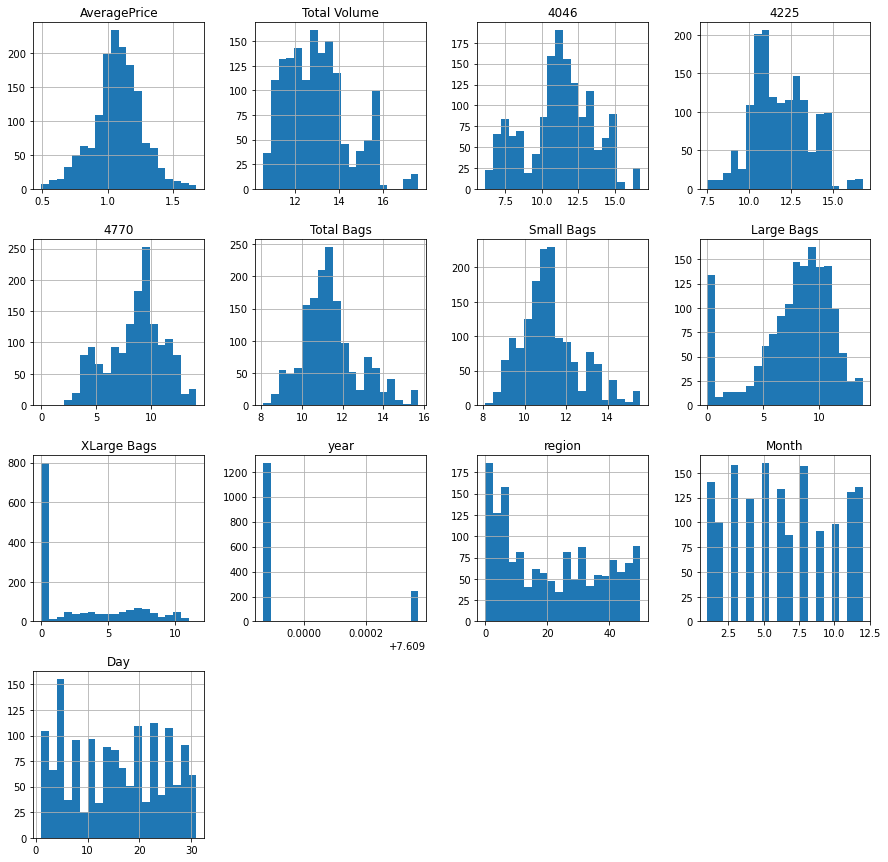

In [30]:
#Now plotting histogram for univariate analysis
df.hist(figsize=(15,15), layout=(4,4), bins=20)

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
year            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
region             AxesSubplot(0.125,0.437414;0.133621x0.130172)
Month           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Day              AxesSubplot(0.44569,0.437414;0.133621x0.130172)
dtype: object

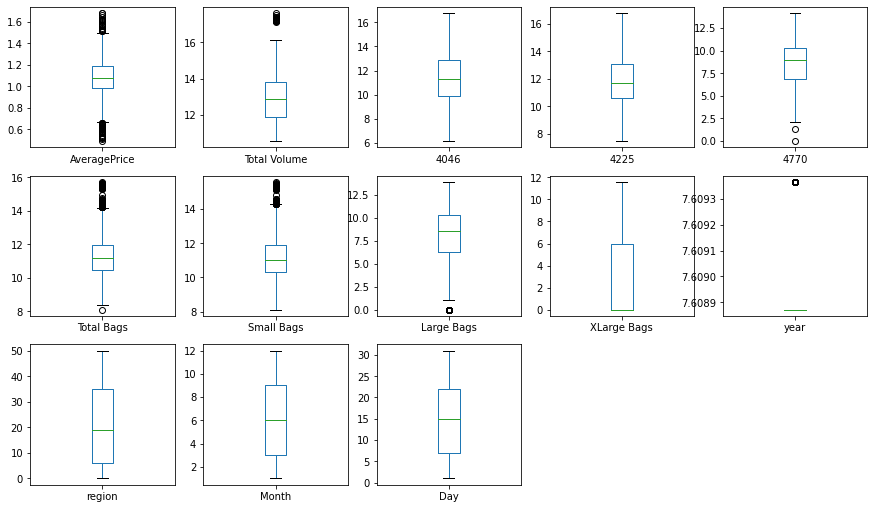

In [31]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

Observation:

1. Here we see that in AveragePrice,Total Volume,Total Bags and Small Bags plots are having outliers.

In [32]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,7.608871,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,7.608871,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,7.608871,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,7.608871,0,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,7.608871,0,11,29


In [33]:
#as there are lot of outliers in the data we will use z score analysis
#calculate the zscore
z = np.abs(zscore(df))

In [34]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 1516, 1516, 1516], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(1517, 13)


In [35]:
#Assign the value to df_new which are less the threshold value and removing the outliers
filtered_entries= (z < 3).all(axis=1)
df_new = df[filtered_entries]

In [36]:
print(df.shape)
print(df_new.shape)
df_new.head()

(1517, 13)
(1502, 13)


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,7.608871,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,7.608871,0,12,20
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,7.608871,0,12,13
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,7.608871,0,6,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,7.608871,0,11,29


In [37]:
df=df_new

In [39]:
for col in df.columns:
    print("Mean of ",col," is ", df[col].mean())

Mean of  AveragePrice  is  1.0749600532623165
Mean of  Total Volume  is  12.989191030734613
Mean of  4046  is  11.178567345107469
Mean of  4225  is  11.841179751933113
Mean of  4770  is  8.527030595612572
Mean of  Total Bags  is  11.359915519325742
Mean of  Small Bags  is  11.170915551350111
Mean of  Large Bags  is  7.807000703805365
Mean of  XLarge Bags  is  2.786653428933131
Mean of  year  is  7.6089508594372175
Mean of  region  is  21.054593874833554
Mean of  Month  is  6.369507323568575
Mean of  Day  is  15.253661784287617


In [40]:
#now finding the mean value of each column and replacing with outlier value
df.loc[df['Large Bags']<4,'Large Bags'] = np.mean(df['Large Bags'])
df.loc[df['Total Volume']>15,'Total Volume'] = np.mean(df['Total Volume'])
df.loc[df['Total Bags']>12.5,'Total Bags'] = np.mean(df['Total Bags'])
df.loc[df['Small Bags']>12.5,'Small Bags'] = np.mean(df['Small Bags'])

AveragePrice       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Total Volume    AxesSubplot(0.285345,0.749828;0.133621x0.130172)
4046             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
4225            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
4770            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Total Bags         AxesSubplot(0.125,0.593621;0.133621x0.130172)
Small Bags      AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Large Bags       AxesSubplot(0.44569,0.593621;0.133621x0.130172)
XLarge Bags     AxesSubplot(0.606034,0.593621;0.133621x0.130172)
year            AxesSubplot(0.766379,0.593621;0.133621x0.130172)
region             AxesSubplot(0.125,0.437414;0.133621x0.130172)
Month           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Day              AxesSubplot(0.44569,0.437414;0.133621x0.130172)
dtype: object

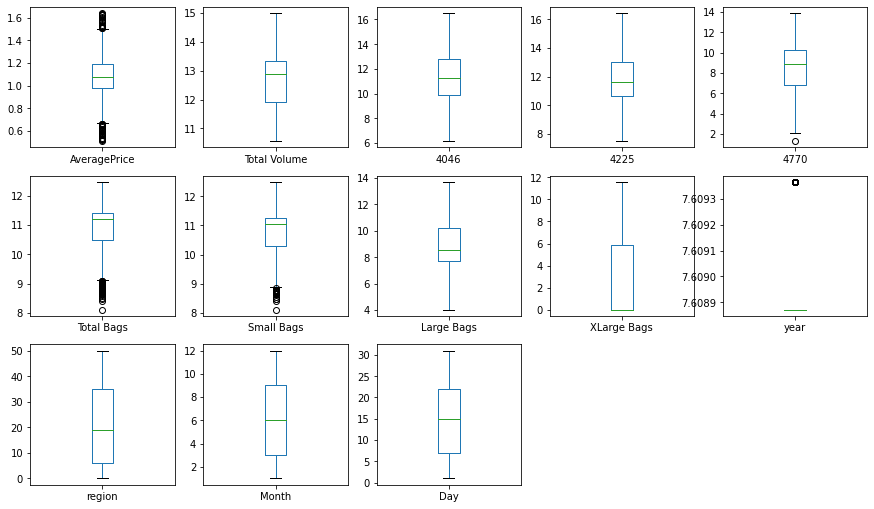

In [41]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

#we can see that outliers have been removed in Total Volume , Large, Small and Total bags

##### Modelling-1 (Regression)

In [42]:
# dropping Average price and day variable from X 
#assign the value of y for training and testing phase
x = df.drop(columns=['AveragePrice','Day'])
y = df[["AveragePrice"]]
#First using Average price as the target variable

In [43]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
sc.fit_transform(x)
df_x = pd.DataFrame(x,columns=x.columns)

In [44]:
#Now by using multiple Algorithms we are calculating the best Algo which performs best for our data set 

models = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),RandomForestRegressor(n_estimators=100)]
r2_score_max = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(df_x,y,random_state = r_state,test_size = 0.2)
    for model in models:
        model.fit(train_x,train_y)
        score = r2_score(test_y,model.predict(test_x))
        pred = model.predict(test_x)
        print("R2 score corresponding to random state " ,r_state ,"is", score)
        if score> r2_score_max:
            r2_score_max=score
            final_state = r_state
            final_model = model
            final_pred = pred
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , r2_score_max ,"and model is",final_model)

R2 score corresponding to random state  40 is 0.6725660553128294
R2 score corresponding to random state  40 is 0.6807027660188423
R2 score corresponding to random state  40 is 0.3687496702072043
R2 score corresponding to random state  40 is 0.8103383860168394
R2 score corresponding to random state  41 is 0.5913007519639275
R2 score corresponding to random state  41 is 0.6304368272027038
R2 score corresponding to random state  41 is 0.27179680966775166
R2 score corresponding to random state  41 is 0.7735000569072874
R2 score corresponding to random state  42 is 0.6590664294039921
R2 score corresponding to random state  42 is 0.6835710174785976
R2 score corresponding to random state  42 is 0.386865303290824
R2 score corresponding to random state  42 is 0.8278111229313412
R2 score corresponding to random state  43 is 0.5493290638594708
R2 score corresponding to random state  43 is 0.6607298311043269
R2 score corresponding to random state  43 is 0.35354331034905595
R2 score corresponding t

max R2 score correspond to random state  46 is 0.8369601169370526 and model is RandomForestRegressor()
Observation: 1.As Randomforest is performing best, we will check best parameters with grid search CV.

In [45]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[10,100,500]}
rfr=RandomForestRegressor()
clf = GridSearchCV(rfr, parameters, cv=5)
clf.fit(df_x,y)
clf.best_params_

{'n_estimators': 100}

In [46]:
#now applying Randomforest regressor as per suggestion 
train_x,test_x,train_y,test_y = train_test_split(df_x,y,random_state = 60,test_size = 0.2)
rfr_new=RandomForestRegressor(n_estimators=500)
rfr_new.fit(train_x,train_y)
pred=rfr_new.predict(test_x)

Text(0, 0.5, 'Predicted Y')

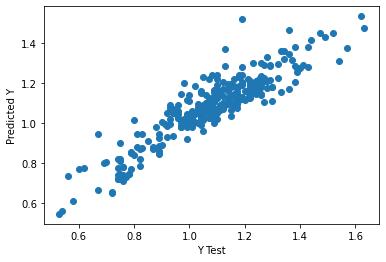

In [47]:
#Plotting our prediction vs test results
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Observation:

1.We nearly have a straight line , which shows that prediction is good.

In [48]:
#calculating errors for comparision
print('MAE:', metrics.mean_absolute_error(test_y, pred))
print('MSE:', metrics.mean_squared_error(test_y, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, pred)))

MAE: 0.06007156146179404
MSE: 0.006340124322923579
RMSE: 0.07962489763210738



Observation:

1.RMSE is low so we can say that model is good.

<AxesSubplot:ylabel='Density'>

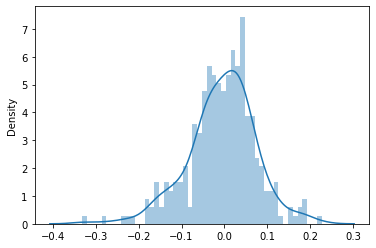

In [49]:
#Checking distribution of our predictions
predict=pred.reshape(-1,1)
sns.distplot((test_y-predict),bins=50)

Observation: 1.Residuals looked to be normally distributed, which infers prediction is not skewed.



In [50]:
#predicted values
df_predict = pd.DataFrame({'Y Test':test_y["AveragePrice"] , 'Pred':pred},columns=['Y Test','Pred'])
df_predict.head()

,Y Test,Pred
257,0.98,1.02348
1314,1.21,1.15376
1137,1.36,1.34800
146,0.96,1.02820
45,1.06,1.10172


###### Saving the Model

In [51]:
import joblib
#save the model as a pickle in a file 
joblib.dump(rfr_new,'rfr_cl_avocado.pkl')

['rfr_cl_avocado.pkl']

###### Conclusion:Model-1 (Regression)¶
Conclusion for Model-1 :

a. Taken output variable as Average Price.

b. Found best model as RandomForestRegressor and best random state is 40 which provides max r2 score of 0.83.

c. Plotted scatter plot and found linear line that shows close match between test and predicted values.

d. Also plotted distplot that shows normal distribution of the predicted values.

e. Also RMSE is found to be 0.08 which is close to zero, showing that model fitting is good.

#### Modelling-2 (Classification)

In [52]:
#Modelling-2
#Taking output variable Y as region 
#Here using classification prediction method as data is categorical .

In [53]:
#Importing classifier model libraries
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [54]:
#Dropping region and Day from x for classifcation dataset
#Assigning the value of x for testing and training
xc=df.drop(columns=['region','Day'])
yc=df[["region"]]

In [55]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
sc.fit_transform(xc)
df_xc = pd.DataFrame(xc,columns=xc.columns)

In [56]:
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.2,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print("Results for model : ",names,'\n',
          "max accuracy score correspond to random state " ,final_state , "is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val)

In [57]:

#Now by using multiple Algorithms we are calculating the best Algo which performs best for our dataset 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)

Results for model :  Logistic Regression 
 max accuracy score correspond to random state  75 is 0.867109634551495 
 Mean accuracy score is :  0.7783189368770764 
 Std deviation score is :  0.048028899083739876 
 Cross validation scores are :   [0.76744186 0.75415282 0.83       0.83333333 0.70666667]
Results for model :  Random Forest 
 max accuracy score correspond to random state  57 is 0.9867109634551495 
 Mean accuracy score is :  0.9228062015503875 
 Std deviation score is :  0.044676186759957846 
 Cross validation scores are :   [0.85049834 0.94352159 0.96666667 0.96333333 0.9       ]
Results for model :  SVM 
 max accuracy score correspond to random state  94 is 0.6744186046511628 
 Mean accuracy score is :  0.6019025470653377 
 Std deviation score is :  0.03753954162594498 
 Cross validation scores are :   [0.53156146 0.61461794 0.64333333 0.60333333 0.61666667]
Results for model :  KNN 
 max accuracy score correspond to random state  75 is 0.8538205980066446 
 Mean accuracy sco

Observation:

1.From initial model values RandomForest and SVC are performing better than others. 

In [58]:
#Checking for them individually
#Estimating parameters of SVM for best fit
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [59]:
svc=SVC(kernel="linear",C=10)
max_acc_score("svc",svc,df_xc,yc)

Results for model :  svc 
 max accuracy score correspond to random state  57 is 0.9700996677740864 
 Mean accuracy score is :  0.899483942414175 
 Std deviation score is :  0.035989388900210174 
 Cross validation scores are :   [0.84385382 0.93023256 0.92       0.93333333 0.87      ]


In [60]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'n_estimators': 500}

In [61]:
#Again running RFC with n_estimator = 100
#random state ~ 57
rf_clf=RandomForestClassifier(n_estimators=100)
max_acc_score("Random Forest Classifier",rf_clf,df_xc,yc)

Results for model :  Random Forest Classifier 
 max accuracy score correspond to random state  57 is 0.9900332225913622 
 Mean accuracy score is :  0.9228194905869322 
 Std deviation score is :  0.038304914996365846 
 Cross validation scores are :   [0.85714286 0.93355482 0.95       0.96       0.92333333]


In [62]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 57,test_size=0.20,stratify=yc)
rf_clf.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(xc_test)

In [63]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

accuracy score is :  0.9867109634551495
classification report 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        15
           7       0.86      1.00      0.92         6
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16     

In [64]:
pred_pb=rf_clf.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)

##### AUC_ROC Curve

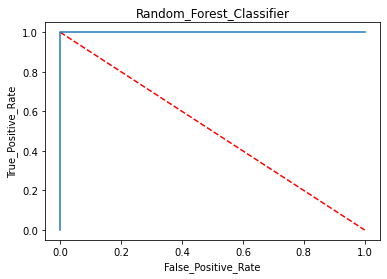

In [65]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'r--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Random_Forest_Classifier")
plt.show()

##### Conclusion:Model-2 (Classification)
Conclusion for Model-2 :

a. Taken output variable as Region data(transformed into numerical value by Label encoder)

b. Found best model as RandomForestClassifier and best random state is 57 which provides max accuracy score of 0.99.

c. Plotted AOC/ROC line that shows close match between test and predicted values.

d. Overall model fit is good.

Overall Remarks :

a. Average price, total bags and total volume is well normally distributed data among all other column.

b. Used zscore analysis and replaced with mean values to remove outliers.

c. No significant correlation observed through heatmap analysis.

d. Spike observed in Oct-Nov month in avg. price of Avocado.

e. We observe that Syracuse and Philadelphia has highest avg. price in all the regions.

f. First found regression model for Avg.price. Found Random forest Regressor with highest accuracy.

g. Second done classifictation model for Regions. Found Random Forest Classifier model with highest accuracy.

##### Saving the Model

In [66]:
import joblib
#save the model as a pickle in a file 
joblib.dump(rf_clf,'rf_clf_avacado.pkl')

['rf_clf_avacado.pkl']